In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The Instructor's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = 13.6667 

In [6]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
11,14
4,0
11,25
1,9
9,18
12,13
12,22
7,10
7,21
1,20


In [7]:
np.average(random_sample.column('Midterm'))

13.555555555555555

In [8]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class
def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [9]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

## Our Decision

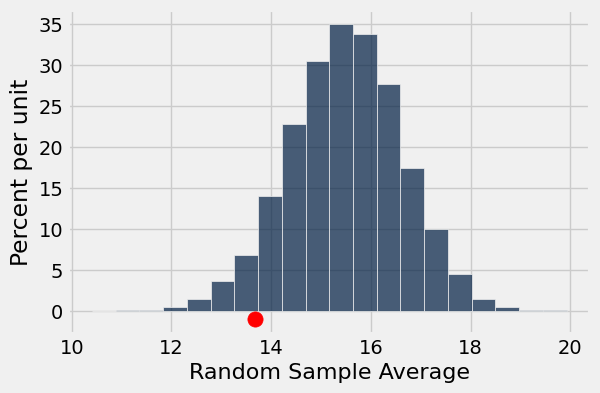

In [10]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, -0.01, color='red', s=120);

### Approach 1

In [13]:
# (1) Calculate the p-value: simulation area beyond observed value
np.count_nonzero(sample_averages <= observed_average)/50000
# (2) See if this is less than 5%

0.05604

In [14]:
# Another way 
np.mean(sample_averages <= observed_average)

0.05604

### Approach 2

In [15]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.62962962962963

In [16]:
# (2) See if this value is greater than observed value
observed_average

13.6667

### Visual Representation

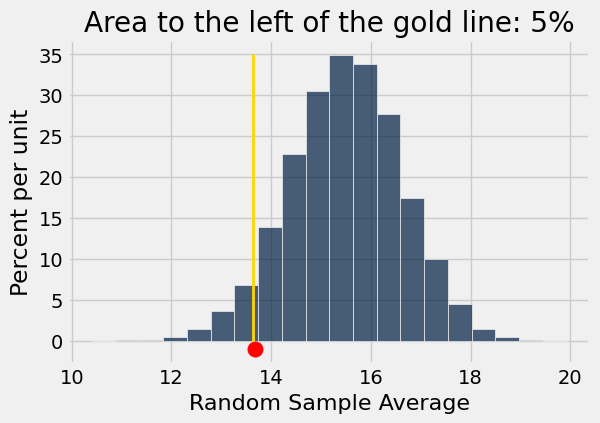

In [17]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.scatter(observed_average, -0.01, color='red', s=120);

# Activity:
Simulate the scenario described in the slides. 
There are 2000 people in a room. Each person tests

**Null**: The coin is fair

**Alternative**: The coin is unfair based on 100 tosses of a coin, 

**Test statistic** | number of heads - 50 |, and the 5% cutoff for the P-value.

Suppose all coins are fair. About how many people will conclude that their coins are unfair?

In [35]:
num_people = 2000
num_tosses = 100
fair_coin = make_array(0.5,0.5)

In [36]:
def get_one_statistic():
    num_heads_in_100_tosses = sample_proportions(num_tosses, fair_coin).item(0)*num_tosses
    return abs(num_heads_in_100_tosses - 50)

In [37]:
# Generate statistics for the 2000 people in the room
peoples_statistics = make_array()

for i in np.arange(num_people):
    peoples_statistics = np.append(peoples_statistics, get_one_statistic())

In [38]:
# Now perform the hypothesis test (simulate 10000 test statistics under the null hypothesis)
# NOTE, we will just do this once. All 2000 people should end up with similar empirical 
# distributions of the test statistic
simulated_statistics = make_array()

for i in np.arange(10000):
    simulated_statistics = np.append(simulated_statistics, get_one_statistic())

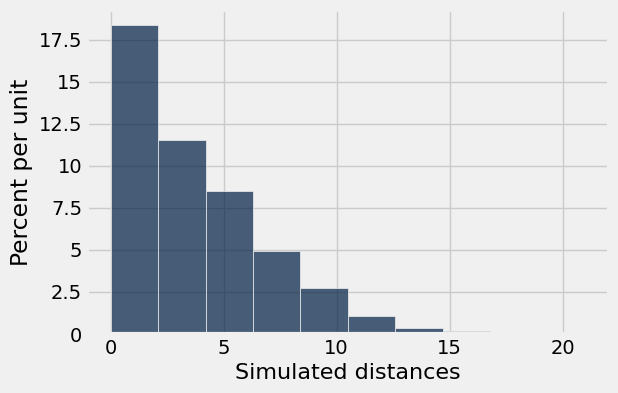

In [39]:
# Plot the empirical distribution of test statistic
stats_table = Table().with_column('Simulated distances',simulated_statistics)
stats_table.hist('Simulated distances')

In [40]:
# Get each person's P-value 
p_vals = make_array()
for persons_stat in peoples_statistics:
    p_vals= np.append(p_vals, np.mean(simulated_statistics >= persons_stat))
    
p_vals

array([ 0.0576,  0.6143,  0.7615, ...,  0.6143,  1.    ,  0.194 ])

In [41]:
np.sum(p_vals < 0.05)

74

In [42]:
np.mean(p_vals < 0.05)

0.036999999999999998

# Comparing Two Samples

In [ ]:
births = Table.read_table('baby.csv')

In [ ]:
births

In [ ]:
smoking_and_birthweight = 

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [ ]:
means_table = 
means_table

In [ ]:
means = 
observed_difference = 
observed_difference

In [ ]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced =   
    
    # table containing group means
    means_table = 
    # array of group means
    means = 
    
    return 

# Random Permutation (Shuffling)

In [ ]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

# Simulation Under Null Hypothesis

In [ ]:
smoking_and_birthweight

In [ ]:
shuffled_labels = 

In [ ]:
original_and_shuffled = 

In [ ]:
original_and_shuffled

# Permutation Test

In [ ]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [ ]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [ ]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');